In [1]:
import httplib

def tmdb_get_latest_movie():
    api_key = "7fbe755e9e83c66a573c6482cefd23ed"
    conn = httplib.HTTPSConnection("api.themoviedb.org")
    conn.request("GET", 
                 "/3/movie/latest?api_key="+api_key, 
                 "{}")
    return conn.getresponse().read().decode("utf-8")

def tmdb_get_movie_by_imdb_id(imdb_id):
    api_key = "7fbe755e9e83c66a573c6482cefd23ed"
    conn = httplib.HTTPSConnection("api.themoviedb.org")
    conn.request("GET", 
                 "/3/find/tt"+str(imdb_id)+"?api_key="+api_key+"&external_source=imdb_id", 
                 "{}")
    return conn.getresponse().read().decode("utf-8")

def tmdb_get_movie_by_tmdb_id(tmdb_id):
    api_key = "7fbe755e9e83c66a573c6482cefd23ed"
    conn = httplib.HTTPSConnection("api.themoviedb.org")
    conn.request("GET", 
                 "/3/movie/"+str(tmdb_id)+"?api_key="+api_key, 
                 "{}")
    return conn.getresponse().read().decode("utf-8")

def tmdb_get_adult(text):
    return text.split("\"adult\":")[1].split(",")[0]

def tmdb_get_collection(text):
    return text.split("\"belongs_to_collection\":")[1].split(",")[0]

def tmdb_get_budget(text):
    return text.split("\"budget\":")[1].split(",")[0]

def tmdb_get_genre(text):
    genre_list = []
    subtext_list = text.split("\"genres\":[")[1].split("],")[0].split("name")[1::]
    for subtext in subtext_list:
        genre_list.append(subtext.split("\":\"")[1].split("\"}")[0])
    return genre_list

def tmdb_get_tmdb_id(text):
    subtext = text.split("homepage")[1].split(",\"imdb")[0].split("\"id\":")[1]
    return subtext.zfill(6)

def tmdb_get_imdb_id(text):
    start_index = text.find("imdb_id\":\"tt")
    return text[start_index+12:start_index+19]

def tmdb_get_title(text):
    return text.split("\"original_title\":\"")[1].split("\",")[0]

def tmdb_get_overview(text):
    return text.split("\"overview\":\"")[1].split(".\"")[0]+"."

def tmdb_get_production_companies(text):
    company_list = []
    subtext_list = text.split("\"production_companies\":[")[1].split("],")[0].split("name")[1::]
    for subtext in subtext_list:
        company_list.append(subtext.split("\":\"")[1].split("\"")[0])
    return company_list

def tmdb_get_production_countries(text):
    country_list = []
    subtext_list = text.split("\"production_countries\":[")[1].split("],")[0].split("name")[1::]
    for subtext in subtext_list:
        country_list.append(subtext.split("\":\"")[1].split("\"")[0])
    return country_list

def tmdb_get_release_date(text):
    return text.split("\"release_date\":\"")[1].split("\",")[0]

def tmdb_get_runtime(text):
    return text.split("\"runtime\":")[1].split(",")[0]

def tmdb_get_spoken_languages(text):
    lang_list = []
    subtext_list = text.split("\"spoken_languages\":[")[1].split("],")[0].split("name")[1::]
    for subtext in subtext_list:
        lang_list.append(subtext.split("\":\"")[1].split("\"")[0])
    return lang_list

def tmdb_get_poster_url(text):
    poster_id = text.split(".jpg")[0].split("/")[1]
    poster_url = "https://image.tmdb.org/t/p/w500/" + poster_id + ".jpg"
    return poster_url

def tmdb_exist(text):
    error_msg = "The resource you requested could not be found."
    if error_msg in text:
        return False
    else:
        return True

In [52]:
# get file list
from os import listdir
from os.path import isfile, join, expanduser
dir_path = expanduser("~/tmdb_movie/")
movie_file_list = [f for f in listdir(dir_path) if isfile(join(dir_path, f))]

# read file into a list
genre_list = []
genre_collapse_list = []
for movie_file in movie_file_list:
    with open(join(dir_path, movie_file), "rb") as myfile:
        movie_text = myfile.read()
        # get genre
        genre_list.append(tmdb_get_genre(movie_text))
        genre_collapse_list = genre_collapse_list + tmdb_get_genre(movie_text)

Counter({'Drama': 14457, 'Comedy': 10982, 'Thriller': 6076, 'Action': 5707, 'Romance': 4926, 'Horror': 4144, 'Crime': 3490, 'Adventure': 2884, 'Family': 2591, 'Science Fiction': 2551, 'Documentary': 2539, 'Foreign': 2250, 'Music': 1902, 'Mystery': 1875, 'Fantasy': 1848, 'Animation': 1847, 'History': 982, 'War': 824, 'Western': 741, 'TV Movie': 360})


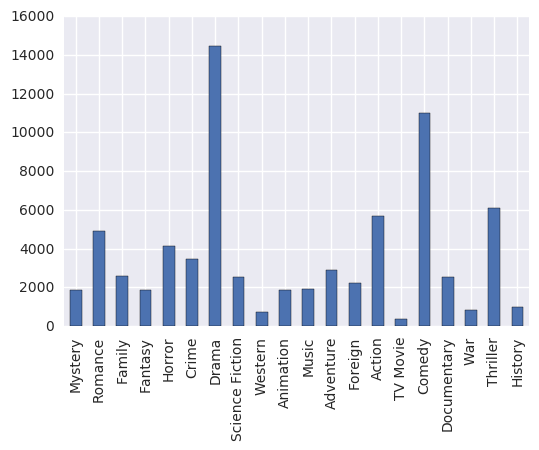

In [91]:
# plot genre frequency bar graph
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

print Counter(genre_collapse_list)

df = pd.DataFrame.from_dict(Counter(genre_collapse_list), orient='index')
df.plot(kind='bar', legend = False)

Most frequent genre: Drama, Comedy, Thriller

In [70]:
from itertools import combinations

genre_category_list = dict(Counter(genre_collapse_list)).keys()
df2 = pd.DataFrame(0, columns = genre_category_list, index = genre_category_list)

for genre in genre_list:
    for pair in list(combinations(genre, 2)):
        df2.loc[pair[0], pair[1]] += 1
        df2.loc[pair[1], pair[0]] += 1

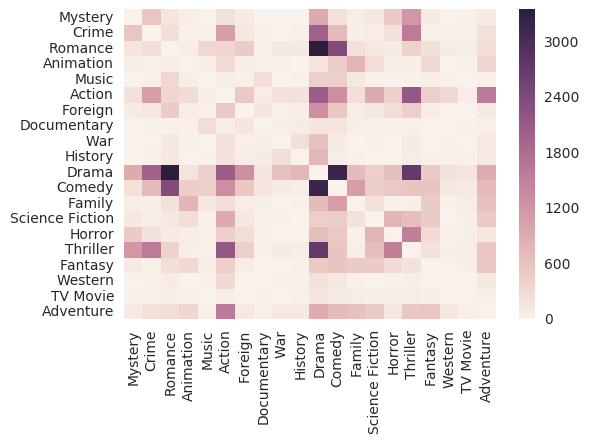

In [93]:
sns.heatmap(df2)

Most frequent pair: Drama/Comedy, Drama/Romance, Drama/Thriller